In [3]:
## For this, we do not need specialisied environment, we will use numpy, scipy and matplotlib

import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate

In [4]:
#Universal constants

w = 0.4128

In [5]:
##let us define the functions to use. We will use a large 

def integrand(x, t, tb):
    return np.sin(x*t)/(1 + (x**2)*(tb**2))


def s(t,tk):
    tb = w*np.pi*tk
    I = integrate.quad(integrand, 0, np.inf, args = (t,tb))[0]
    return I

In [14]:
print(s(0,0.08))

0.0


In [6]:
# gamma_imp =    # depends on v_F somehow, have to find that relation
#tk = 3*gamma_imp/(w*(np.pi**2))

def tk_col(theta,theta_k):
    return 2*theta*np.cos(theta)*np.exp(-0.5*np.pi*np.sin(theta)/theta_k)

In [8]:
theta_list = [np.pi/3,np.pi/4]
thetak_list = [np.pi/4,np.pi/6]

for theta in theta_list:
    for thetak in thetak_list:
        tk = tk_col(theta,thetak)
        print("Kondo temperature for theta = ",round(theta,2)," and theta_k = ",round(thetak,2)," is ",round(tk,2))

Kondo temperature for theta =  1.05  and theta_k =  0.79  is  0.19
Kondo temperature for theta =  1.05  and theta_k =  0.52  is  0.08
Kondo temperature for theta =  0.79  and theta_k =  0.79  is  0.27
Kondo temperature for theta =  0.79  and theta_k =  0.52  is  0.13


In [9]:
def c_eq(t,tb,tk):
    return (0.25*np.exp(-2*t/tb) - s(t,tk)**2)

In [15]:
def correlator(tw,t,tb,tk):
    val = c_eq(t,tb,tk) - 2*np.exp(-tw/tb)*s(t,tk)*(s(tw,tk)*np.exp(-t/tb) - s(tw+t,tk)) - np.exp(-2*tw/tb)*(s(tw,tk)*np.exp(-t/tb) - s(tw+t,tk))**2
    return val

In [16]:
def plot_sz(tw,theta_list,thetak_list,n = 100):
    t_list = list(range(n))
    for theta in theta_list:
        for thetak in thetak_list:
            val_list = []
            tk = tk_col(theta,thetak)
            tb = w*np.pi*tk
            for t in t_list:
                val_list.append(2*correlator(tw,t,tb,tk))
            plt.plot(t_list,val_list,label = "theta = "+str(round(theta,2))+" and theta_k = "+str(round(thetak,2)))
            plt.xlabel("Time")
            plt.ylabel("magnetization")
            plt.legend()
            plt.show()

            


In [24]:
def plot_corr0(theta_list,thetak_list,n = 100):
    t_list = list(range(n))
    for theta in theta_list:
        for thetak in thetak_list:
            val_list = []
            tk = tk_col(theta,thetak)
            tb = w*np.pi*tk
            for t in t_list:
                val_list.append(-np.exp(-t/tb))
            plt.plot(t_list,val_list,label = "theta = "+str(round(theta,2))+" and theta_k = "+str(round(thetak,2)))
            plt.xlabel("Time")
            plt.ylabel("<Sz(t)>")
            plt.title("Analytical Kondo Magnetization function")
            plt.legend()
            plt.show()

def plot_corr0_2(theta,theta_k, n = 100):
    t_list = list(range(n))
    val_list = []
    tk = tk_col(theta,thetak)
    tb = w*np.pi*tk
    for t in t_list:
        val_list.append(-np.exp(-t/tb))
    return val_list
           

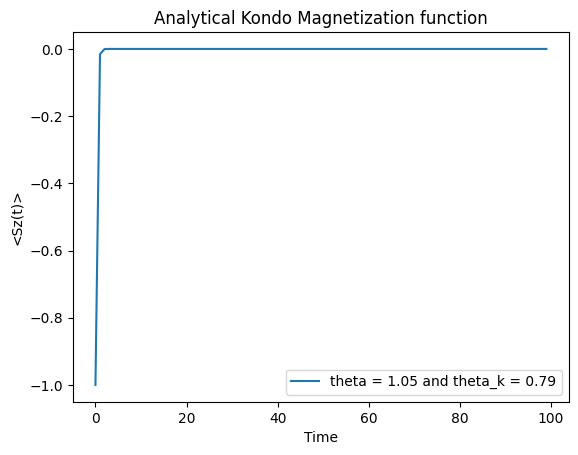

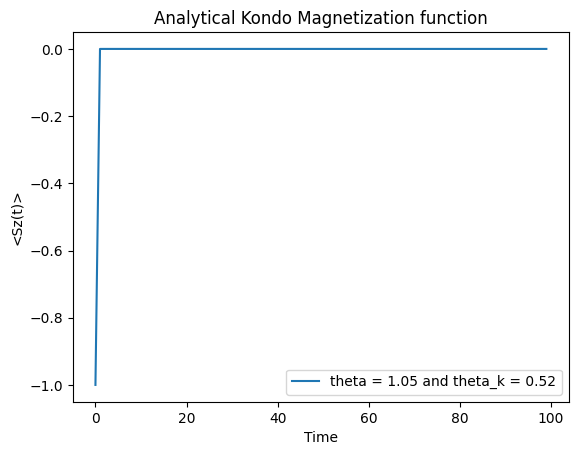

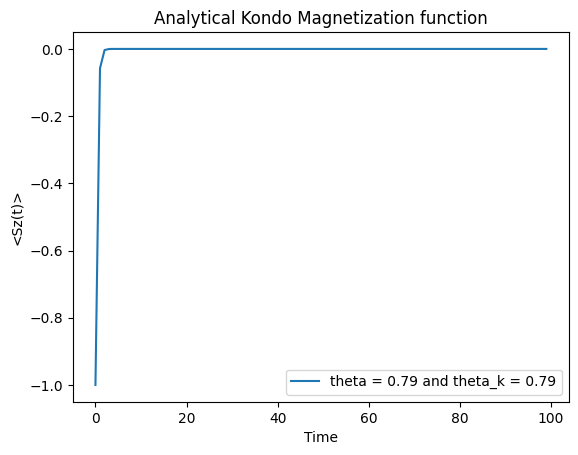

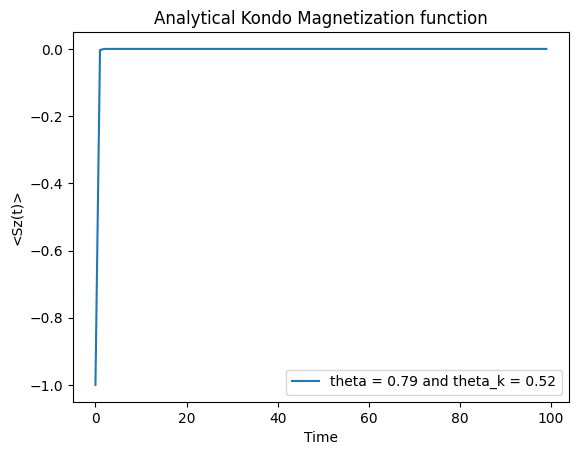

In [21]:
plot_corr0(theta_list,thetak_list)

In [23]:
#Let us draw a comparision plot for analytical and numerical magnetization

N = 6
theta= 1.07 #pass the true values here
theta_k = 0.79
max_trotter_steps = 400

#i = 0

sz_vals = [0]*max_trotter_steps  
sz_vals2 = [0]*max_trotter_steps
sz_vals3 = [0]*max_trotter_steps
sz_vals4 = [0]*max_trotter_steps
sz_vals5 = [0]*max_trotter_steps

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""

for i in range(max_trotter_steps):
    data2 = np.loadtxt(f"../scaled_codes/data/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals2[i] = data2[1]  
    #data2 = np.loadtxt(f"scaled_codes/data/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    #sz_vals5[i] = data2[1]     

In [26]:
val_list = plot_corr0_2(np.pi/3,np.pi/4, n = 400)

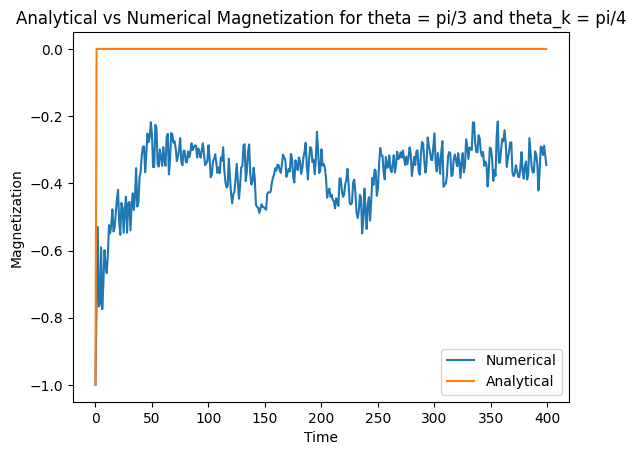

In [27]:
## Now we will plot the magnetization values
t_list = list(range(400))

plt.plot(t_list,sz_vals2,label = "Numerical")
plt.plot(t_list,val_list,label = "Analytical")

plt.xlabel("Time")
plt.ylabel("Magnetization")
plt.title("Analytical vs Numerical Magnetization for theta = pi/3 and theta_k = pi/4")

plt.legend()
